<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

##Autor:[M. Sc. (c) Gustavo Valdivia M.](https://gcvaldivia.github.io) 
##Institución: ICTP - EAIFR
##Correo: gvaldivia@eaifr.org
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Sesión 9. Órbitas de partículas en un espacio-tiempo tipo Schwarschild
<p align="center">
  <img src="https://www.physicsoftheuniverse.com/images/relativity_curved_space.jpg"  width=35% />
</p>

## Outline

1. 4th order RK for n-ODEs
2. Schwarschild spacetime
3. Time-like geodesics
4. Null-like geodesics





## 1. Resumen



Determinaremos las órbitas de partículas con masa y sin masa debido al potencial efectivo de un agujero negro en un espacio-tiempo tipo Schwarzschild. Para este propósito implementaremos el método numérico de Runge-Kutta de orden 4.

## Runge-Kuta de 4to orden


Vamos a aplicar el método de RK-4, que es útil para resolver ecuaciones diferenciales del siguiente tipo:

$$
y'(x)=f(x,y)
$$

$$
y(x_o)=y_o
$$

El algoritmo tiene la siguiente forma:

$$
y_{j+1}=y_j+\dfrac{1}{6}\left(k_0+2k_1+2k_2+k_3\right)
$$

Donde $k_0$, $k_1$, $k_2$ y $k_3$ tienen la siguiente forma:

$$
k_0=hf(x_j,y_j)\\
k_1=hf\left(x_j+\frac{h}{2},y_j+\frac{k_0}{2}\right)\\
k_2=hf\left(x_j+\frac{h}{2},y_j+\frac{k_1}{2} \right)\\
k_3=hf\left(x_j+h,y_j+k_2\right)$$

#### RK4 en EDO de 1er orden

Para tener claro este método vamos a obtenemr la solución numérica para el siguiente ejemplo:

$$
y'(x)=-\frac{30}{1-x^2}+\frac{2x}{1-x^2}y(x)-y^2(x)
$$

$$
y(0.05)=19.53
$$

En este caso tenemos:

$$
f(x,y)=-\frac{30}{1-x^2}+\frac{2x}{1-x^2}y(x)-y^2(x)
$$

A continuación implementaremos el código y plotearemos la solución numérica.

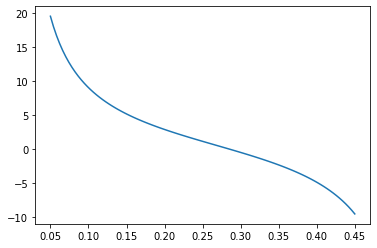

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return -30/(1-x**2)+2*x*y/(1-x**2)-y**2

def rk4(f,x0,xf,n,y0):
    h=(xf-x0)/(n-1) 
    xs=x0+np.arange(n)*h
    ys=np.zeros(n)
    y=y0
    for j,x in enumerate(xs):
        ys[j]=y
        k0=h*f(x,y)
        k1=h*f(x+h/2,y+k0/2)
        k2=h*f(x+h/2,y+k1/2)
        k3=h*f(x+h,y+k2)
        y=y+(k0+2*k1+2*k2+k3)/6
    return xs,ys

xs, ys = rk4(f,0.05, 0.45, 100, 19.53)

plt.plot(xs,ys)

#### RK4 en EDO de 2do orden

Tenemos la siguiente ecuación diferencial:

$$
w''(x)=-\frac{30}{1-x^2}w(x)+\frac{2x}{1-x^2}w'(x)
$$

$$
w(0.05)=0.0926587109375
$$

$$
w′(0.05) = 1.80962109375
$$

Mediante la transformación $y(x)=\frac{w'(x)}{w(x)}\rightarrow y'(x)=\frac{w''(x)}{w(x)}-\frac{w'^2(x)}{w^2(x)}=\frac{w''(x)}{w(x)}-y^2(x)$, obtenemos:

$$
y'(x)=-\frac{30}{1-x^2}+\frac{2x}{1-x^2}y(x)-y^2(x)
$$

Que es precisamente la ecuación diferencial que estudiamos en el ejemplo anterior. De esta forma, para comprobar nuestra solución debemos llegar a la misma gráfica.

**El método**

Hacemos:

$$
w'(x)=y_1(x)
$$

$$
w(x)=y_0(x)
$$

Con lo cual, ahora tenemos el siguiente sistema de 2 ecuaciones diferenciales acopladas:

$$
y_1'(x)=-\frac{30}{1-x^2}y_0(x)+\frac{2x}{1-x^2}y_1(x) \rightarrow y_1'(x)=f_1(x,y_0,y_1)
$$

$$
y_0'(x)=y_1(x)\rightarrow y_0'(x)=f_0(x,y_0,y_1)
$$

$$
y_0(0.05)=0.0926587109375
$$

$$
y_1(0.05) = 1.80962109375
$$


In [ ]:
def fs(x,yvals):
    y0, y1 = yvals
    f0 = y1
    f1 = - (30/(1-x**2))*y0 + ((2*x)/(1-x**2))*y1
    return np.array([f0, f1])

def rk4_gen(fs,x0,xf,n,yinits):
    h = (xf-x0)/(n-1)
    xs = x0 + np.arange(n)*h
    ys = np.zeros((n, yinits.size))
    yvals = np.copy(yinits)
    for j,x in enumerate(xs):
        ys[j,:] = yvals
        k0 = h*fs(x, yvals)
        k1 = h*fs(x+h/2, yvals+k0/2)
        k2 = h*fs(x+h/2, yvals+k1/2)
        k3 = h*fs(x+h, yvals+k2)
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

x0,xf,n=0.05,0.45,100
yinits = np.array([0.0926587109375, 1.80962109375])
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

A continuación recuperaremos el resultado del ejemplo anterior.

Primeros creamos un array de ceros con longitud determinada por n:

In [ ]:
y_s=np.zeros(n)

Aquí reescribimos cada valor del array anterior para obtener $y(x)=w'(x)/w(x)$, recordemos que $w'(x)=y1(x)$ y $w(x)=y0(x)$:

In [ ]:
for i in range(len(ys[:,0])):
    y_s[i]=ys[i,1]/ys[i,0]

Finalmente ploteamos y obtenemos el mismo resultado. ¡Todo un éxito!

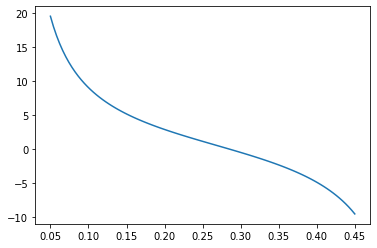

In [ ]:
plt.plot(xs,y_s)

## Orbits in Schwarzschild space-time


### 3. Time-like geodesics

We arrive at the following expression for energy:

$$
E=\frac{\dot{r}^2}{c^2}+U_{eff}
$$

Where $E=\bar{\mathcal{E}}^{2}-1$, and its dimension is equal to 1. The effective potential is given by the following expression:

$$
U_{eff}=-\frac{r_h}{r} + \frac{\bar{\mathcal{J}}^2c^2}{r^2} - \frac{r_h\bar{\mathcal{J}}^2 c^2}{r^3}
$$

The extremes are given by:

$$
\frac{\partial U_{eff}}{\partial r}\Big|_{r=r_*}=0 \rightarrow r_*^{\pm}=\frac{\bar{\mathcal{J}}^2c^2}{r_h}\pm \frac{1}{2}\sqrt{\frac{4\bar{\mathcal{J}}^4c^4}{r_h^2}-12\bar{\mathcal{J}}^2c^2}
$$

From the square root we have the following condition for the existence of extremes:

$$
\bar{\mathcal{J}}^2\ge\frac{3r_h^2}{c^2}
$$

We know that $r_h=\frac{2MG_N}{c^2}$, therefore, this condition will also be expressed as follows:

$$
\bar{\mathcal{J}}^2\ge\frac{12M^2G^2_N}{c^6}
$$

As we know:

$$
G_N= 4\pi^2\,\,AU^3 M_{\odot}^{-1}yr^{-2}\quad\quad \& \quad\quad c\approx 63197.8\,\,AU yr^{-1}
$$

The condition for having extremes gives us the freedom to set:

$$
\bar{\mathcal{J}}^2=\frac{24M^2G^2_N}{c^6}
$$

Then, setting $M=10^{6} M_{\odot}$, we obtain $\bar{\mathcal{J}}^2=5.871092923045804\times 10^{-13} yr^2$. The effective potential and the extremes will be:

$$
U_{eff}(r)=-\frac{0.0000463563}{r} + \frac{0.00234489}{r^2} - \frac{0.0197691}{r^3}
$$

$$
r_*^- \approx 0.03474132510043436\,\,AU,\quad r_*^+ \approx 0.20248728156499723\,\,AU
$$

In addition:

$$
r_h=0.01976905055545263\,\,AU
$$

In the figure shown below we note that $r_*^+$ corresponds to the minimum of the potential, while $r_*^-$, with the max. The potential at these points will be:

$$
U_{eff}^{min}=U_{eff}(r_*^+)=-0.04602372915256611
$$

$$
U_{eff}^{max}=U_{eff}(r_*^-)=0.2682459513747886
$$

### 1.1 Effective Potetial Plots

#### a) Maximun and minimum of $U_{eff}$

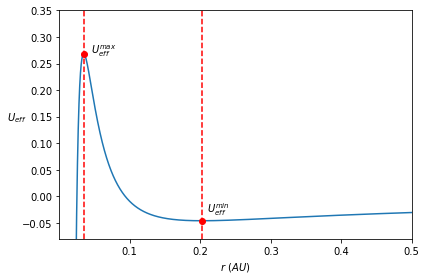

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8

r=np.linspace(10**-10,0.5,10**4)
fig,ax = plt.subplots()
ax.plot(r,-rh/r + (J2*(c**2))/r**2 - (J2*(c**2)*rh)/r**3)
ax.axvline(x=rminus,color='r', linestyle='--')
ax.axvline(x=rplus,color='r', linestyle='--')

ax.plot(rplus,Umin,'ro')
ax.text(0.21,-0.03,'$U_{eff}^{min}$')

ax.plot(rminus,Umax,'ro')
ax.text(0.045,0.27,'$U_{eff}^{max}$')

ax.set_ylim(-0.08,0.35)
ax.set_xlim(10**(-10),0.5)
ax.set_ylabel('$U_{eff}$',rotation=0)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.set_xlabel('$r\,\,(AU)$')
plt.tight_layout()

#from google.colab import files
#plt.savefig('name.pdf',bbox_inches='tight') 
#files.download("name.pdf") 

#### b) Energy levels $(E=\bar{\mathcal{E}}^{2}-1)$ in $U_{eff}$

We will obtain the orbit described for a particle at each energy level.

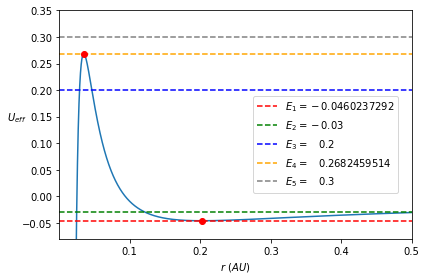

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8

r=np.linspace(10**-10,0.5,10**4)
fig,ax = plt.subplots()
ax.plot(r,-rh/r + (J2*(c**2))/r**2 - (J2*(c**2)*rh)/r**3)

ax.axhline(y=Umin,color='r',linestyle='--',label='$E_1=-0.0460237292$')
ax.axhline(y=-0.03,color='g',linestyle='--',label='$E_2=-0.03$')
ax.axhline(y=0.2,color='b',linestyle='--',label='$E_3=\quad 0.2$')
ax.axhline(y=Umax,color='orange',linestyle='--',label='$E_4=\quad 0.2682459514$')
ax.axhline(y=0.3,color='gray',linestyle='--',label='$E_5=\quad0.3$')

ax.set_ylim(-0.08,0.35)
ax.set_xlim(10**(-10),0.5)
ax.set_ylabel('$U_{eff}$',rotation=0)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.set_xlabel('$r\,\,(AU)$')

ax.plot(rplus,Umin,'ro')
ax.plot(rminus,Umax,'ro')

ax.legend(loc="lower center", bbox_to_anchor=(0.755, 0.18), ncol= 1)
plt.tight_layout()


#### c) Energy regions in the effective potential

Each type of orbit that we will obtain is related to an specific energy region.

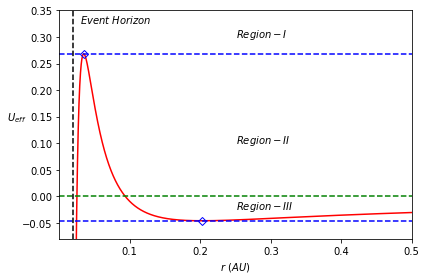

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8

r=np.linspace(10**-10,0.5,10**4)
fig,ax = plt.subplots()
ax.plot(r,-rh/r + (J2*(c**2))/r**2 - (J2*(c**2)*rh)/r**3,'r')

ax.axhline(y=Umin,color='blue',linestyle='--')
ax.axhline(y=0,color='green',linestyle='--')
ax.axhline(y=Umax,color='blue',linestyle='--')
ax.axvline(x=rh,color='k', linestyle='--')

ax.set_ylim(-0.08,0.35)
ax.set_xlim(10**(-10),0.5)

ax.plot(rplus,Umin,'bD',fillstyle='none')
ax.plot(rminus,Umax,'bD',fillstyle='none')

ax.text(rh+0.01,0.325,'$Event\,\,Horizon$')
ax.text(.25,0.3,'$Region-I$')
ax.text(.25,0.1,'$Region-II$')
ax.text(.25,-0.025,'$Region-III$')

ax.set_ylabel('$U_{eff}$',rotation=0)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.set_xlabel('$r\,\,(AU$)')
plt.tight_layout()


### 1.2 Solution of the orbit equation applying RungeKuta-4

The differential equation of the orbit has the following form:

$$
u''(\varphi)=\frac{3r_h}{2}u^2(\varphi)-u(\varphi)+\frac{1}{\lambda}
$$

Where:
$$
u(\varphi)=\frac{1}{r(\varphi)} \quad\quad , \quad\quad u'(\varphi)=-u^2(\varphi)r'(\varphi) \quad\quad\& \quad\quad \lambda=\frac{2c^2\bar{\mathcal{J}}^2}{r_h}=0.2372286066654316
$$

To obtain the orbit we will apply the 4th order Runge-Kuta method, which is a fairly successful numerical method, for this we will apply the following change of variables:

$$
y_o(\varphi)=u(\varphi)
$$

$$
y_1(\varphi)=u'(\varphi)
$$

In this way, we obtain the following system of two coupled differential equations:

$$
y_1'(\varphi)=\frac{3r_h}{2}y_0^2(\varphi)-y_0(\varphi)+\frac{1}{\lambda}
$$

$$
y_0'(\varphi)=y_1(\varphi)
$$

We only require the following initial values to solve this using RK4:

$$
y_0(\varphi_0)=u(\varphi_0)=u_0 \quad\quad,\quad y_1(\varphi_0)=u'(\varphi_0)=u'_0
$$

Let's remember:

$$
u(\varphi_0)=u_0=\frac{1}{r_0} \quad\quad,\quad u'(\varphi_0)=u'_0=-\frac{r'_0}{r^2_0}
$$

Where, from the killing vector $\partial_{\varphi}$ we obtain:

$$
\dot{r}(\varphi)=r'(\varphi)\dot{\varphi}=r'(\varphi)\frac{\bar{\mathcal{J}}c^2}{r^2} \rightarrow r'=\frac{\dot{r}r^2}{\bar{\mathcal{J}}c^2}
$$

Therefore:

$$
u(\varphi_0)=u_0=\frac{1}{r_0} \quad\quad,\quad u'(\varphi_0)=u'_0=-\frac{\dot{r}_0}{\bar{\mathcal{J}}c^2}
$$

Let us implement the RK4 method:

In [ ]:
lam=0.2372286066654316
rh=0.01976905055545263

def fs(x,yvals):
    y0,y1=yvals
    f0=y1
    f1=(3*rh/2)*y0**2-y0+1/lam
    return np.array([f0, f1])

def rk4_gen(fs,x0,xf,n,yinits):
    h=(xf-x0)/(n-1)
    xs=x0+np.arange(n)*h
    ys=np.zeros((n, yinits.size))
    yvals=np.copy(yinits)
    for j,x in enumerate(xs):
        ys[j,:]=yvals
        k0=h*fs(x, yvals)
        k1=h*fs(x+h/2, yvals+k0/2)
        k2=h*fs(x+h/2, yvals+k1/2)
        k3=h*fs(x+h, yvals+k2)
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

#### 1.2.1 Plots of the orbits at each energy level.

### a) $E = E_1$

In this case we have $E=U_{eff}^{min}=-0.04602372915256611$, with which we have the following initial conditions:

$$
r_0=r_*^+=0.20248728156499723 \quad \& \quad \dot{r}_0=0
$$

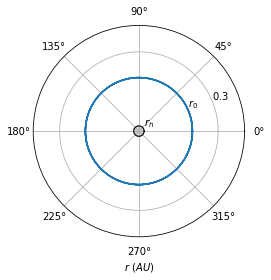

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8
r0=rplus
r_dot0=0
J=np.sqrt(J2)

#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(J*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=0,6*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################
    
########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.4)
ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([rh,r0,0.3])
ax.set_rlabel_position(22.5)
rtick_labels = ['$r_h$','$r_0$','$0.3$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_0$') 
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

### b) $E = E_2$

In this case we have $E=E_2=-0.03$, for this value we will have 3 points of intersection with the effective potential, which are obtained by the equation $U_{eff}=E_2$:

$$
r_1=0.02473253017278028\,\,AU
$$

$$
r_2=0.12195911908713783\,\,AU
$$

$$
r_3=0.512276702588503\,\,AU
$$

For the case we want to study, we are going to consider that our particle under study is in the bound orbit due to the potential between the points $r_2$ y $r_3$. This allows us to set the following initial values for our scaled plot:

$$
r_0=r_3\quad \& \quad \dot{r}_0=0
$$

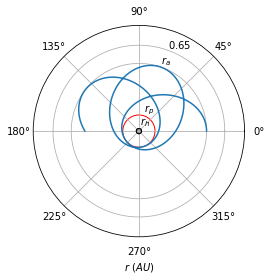

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8
r0=0.512276702588503  #Aphelion
r2=0.12195911908713783  #Perihelion
r_dot0=0
J=np.sqrt(J2)

#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(J*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=0*np.pi,5*np.pi,1000
yinits = np.array([u0,u_prime0])  
xs, ys = rk4_gen(fs,x0,xf,n,yinits)
###############################

########## Plot ##########
y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.8)
ax.set_xlabel('$r\,\,(AU$)')

circle1 = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k")
ax.add_artist(circle1)
circle2 = plt.Circle((0,0), r2, transform=ax.transData._b, fc='white',fill=False,ec="r")
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([rh,r2,r0,0.65])
ax.set_rlabel_position(70.5)
rtick_labels = ['$r_h$','$r_p$','$r_a$','$0.65$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_p$') 
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

### c) $E = E_3$

In this case we have $E=E_3=0.2$, for that value, considering that $r>0$, we will have 2 points of intersection with the effective potential, which are obtained by the equation $U_{eff}=E_3$:

$$
r_1=0.028797478424216053\,\,AU
$$

$$
r_2=0.04627785649134387\,\,AU
$$

For this case we are going to consider that the particle comes from infinity, $r\rightarrow \infty$,then the effective potential will be:

$$
\lim_{r\rightarrow \infty}U_{eff}=0
$$

Therefore, we will have that the energy will be completely kinetic:

$$
E=\frac{\dot{r}^2}{c^2}+U_{eff}\approx \frac{\dot{r}^2}{c^2}
$$

Then, the initial values are given by:

$$
r_0\rightarrow \infty \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

For numerical purposes we have:

$$
r_0=10^{20}\,\,AU \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

Where:

$$
E=0.2
$$

#### Close-up view of the plot

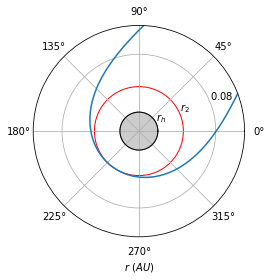

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8
r0=10**20
r2=0.04627785649134387
r_dot0=np.sqrt(0.2)*c
J=np.sqrt(J2)


#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(J*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=3.5*np.pi,7*np.pi,1000   
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################

########## Plot ##########  
fig,ax= plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.11)
ax.set_xlabel('$r\,\,(AU)$')

circle1 = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
circle2 = plt.Circle((0,0), r2, transform=ax.transData._b, fc='gray',fill=False,ec="r")
ax.add_artist(circle1)
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([rh,r2,.08])
ax.set_rlabel_position(22.5)
rtick_labels = ['$r_h$','$r_2$','$0.08$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_2$') 
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

#### Distant view of the plot

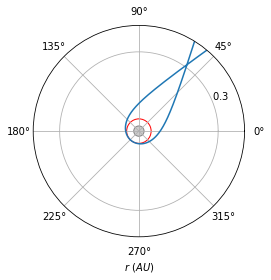

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8
r0=10**20
r2=0.04627785649134387
r_dot0=np.sqrt(0.2)*c
J=np.sqrt(J2)


#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(J*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=3.5*np.pi,7*np.pi,1000   
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################

########## Plot ##########  
fig,ax= plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.4)
ax.set_xlabel('$r\,\,(AU$)')

circle1 = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
circle2 = plt.Circle((0,0), r2, transform=ax.transData._b, fc='gray',fill=False,ec="r")
ax.add_artist(circle1)
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([.3])
ax.set_rlabel_position(22.5)
rtick_labels = ['$0.3$']
ax.set_yticklabels(rtick_labels)
plt.tight_layout()

#########################

### d) $E = E_4$

In this case we have $E=E_4=0.2682459513747886$, with which we will have the following initial values:

$$
r_0=r_*^-=0.03474132510043436\,\, AU\quad \& \quad \dot{r}_0=0
$$

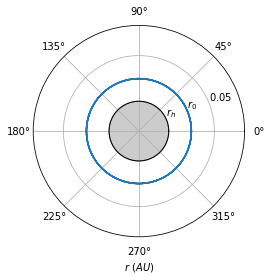

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8
r0=rminus
r_dot0=0
J=np.sqrt(J2)

#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(J*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=0,6*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################

########## Plot ########## 
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.07)
ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([rh,r0,.05])
ax.set_rlabel_position(22.5)
rtick_labels = ['$r_h$', '$r_0$','$0.05$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_0$') 
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

### d.1) $E_1$ and $E_4$:

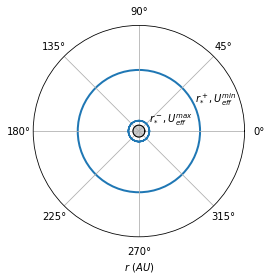

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8
r0=rminus
r_dot0=0
J=np.sqrt(J2)

##### To give the precise color to the circumference ####
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
#########################################################

#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(J*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=0,6*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################

########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.35)
ax.set_xlabel('$r\,\,(AU$)')

circle1 = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle1)
circle2 = plt.Circle((0,0), rplus, transform=ax.transData._b, fc='gray',fill=False,ec=cycle[0],lw=2)
ax.add_artist(circle2)

ax.grid(True)
ax.set_rticks([rh,rminus,rplus])
ax.set_rlabel_position(22.5)
rtick_labels = ['','$r_{*}^-, U_{eff}^{max}$', '$r_{*}^+, U_{eff}^{min}$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_{*}^+, U_{eff}^{min}$') 
j=rtick_labels.index('$r_{*}^-, U_{eff}^{max}$') 
k=rtick_labels.index('') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[k].set_linewidth(1)
rgrid[k].set_color('k')
plt.tight_layout()

#########################

### d) $E = E_5$

In this case we have $E=0.3$, for that value, considering that $r>0$, we will not have points of intersection with the effective potential. 

Let us consider that the particle comes from infinity, $r\rightarrow \infty$, then the effective potential will be:

$$
\lim_{r\rightarrow \infty}U_{eff}=0
$$

Therefore, we will have that the energy will be completely kinetic:

$$
E=\frac{\dot{r}^2}{c^2}+U_{eff}\approx \frac{\dot{r}^2}{c^2}
$$

Then, the initial values are given by:

$$
r_0\rightarrow \infty \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

For numerical purposes we have:

$$
r_0=10^{20}\,\,AU \quad \& \quad \dot{r}_0=\sqrt{Ec^2}
$$

Where:

$$
E=0.3
$$

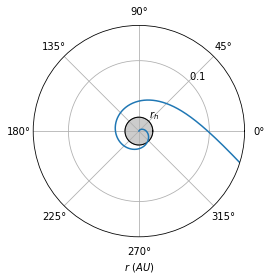

In [ ]:
rh=0.01976905055545263
rminus=0.03474132510043436
rplus=0.20248728156499723
Umin=-0.04602372915256611
Umax=0.2682459513747886
J2=5.871092923045804*10**(-13)
c=63197.8
r0=10**20
r_dot0=np.sqrt(0.3)*c
J=np.sqrt(J2)


#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(J*c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=3*np.pi,6.5*np.pi,1000   
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################

########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.15)
ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([rh,.1])
ax.set_rlabel_position(45)
rtick_labels = ['$r_h$','$0.1$']
ax.set_yticklabels(rtick_labels)
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

### 4. Null-like geodesics

Here we consider an affine parameter $\xi$:

$$
g_{tt}\xi_{(t)}^{t}u^{t}=constant
\qquad\rightarrow\qquad 
\frac{dt}{d\xi}=
\frac{\overline{\mathcal{E}}}{N(r)}
$$

$$
g_{\varphi\varphi}\xi_{(\varphi)}^{\varphi}u^{\varphi}
=constant
\qquad\rightarrow\qquad
\frac{d\varphi}{d\xi}=\frac{\bar{\mathcal{J}}c^{2}}{r^{2}}
$$

Using the above results in 

$$
0
=-N(r)c^{2}\dot{t}^{2}+\frac{\dot{r}^{2}}{N(r)}+r^{2}\dot{\varphi}^{2}
$$
	
we obtain:
	
$$
0=-N(r)c^2\left(\frac{\overline{\mathcal{E}}}{N(r)} \right)^2+\dfrac{\dot{r}^2}{N(r)}+r^2\left(\frac{\bar{\mathcal{J}}c^{2}}{r^{2}}\right)^2
$$

Multiplying by $N(r)$:

$$
0=-c^2\bar{\mathcal{E}}^2+\dot{r}^2+N(r)\frac{\bar{\mathcal{J}}^2c^{4}}{r^{2}}
$$

Then:

$$
\left(\frac{dr}{d\xi}\right)^{2}+\mathcal{V}_{eff}(r)=c^2\overline{\mathcal{E}}^2
$$

Where $\mathcal{V}_{eff}(r)$ is the effective potential for massless particles:

$$
\mathcal{V}_{eff}(r)=\frac{N(r)\bar{\mathcal{J}}^2c^{4}}{r^{2}}
$$

Dividing by $\bar{\mathcal{J}}^2$ and then scaling the affine parameter as: 

$$
\xi \rightarrow \frac{\xi}{\bar{\mathcal{J}}}
$$

As $\bar{\xi}=\frac{\xi}{mc^2}$, by default we obtain

$$
\bar{\xi} \rightarrow \frac{\bar{\xi}}{\bar{\mathcal{J}}}
$$

We arrive to the following expression:

$$
E=\left(\frac{dr}{d\xi}\right)^{2}+\mathcal{V}_{eff}(r)
$$

The effective potential is given by:

$$
\mathcal{V}_{eff}(r)=\frac{N(r)c^{4}}{r^{2}}=\frac{c^4}{r^2}-\frac{r_h c^4}{r^3}
$$

And the energy in terms of the impact parameter:

$$
E=\frac{c^2}{b^{2}}
$$

$$
b^2=\frac{\bar{\mathcal{J}}^2}{\bar{\mathcal{E}}^2}
$$

The effective potential has a maximum value at $r_*$:

$$
r_*=\frac{3MG_N}{c^2}
$$

As we know: 

$$
r_h=\frac{2MG_N}{c^2}\qquad,\qquad G_N=4\pi^2 AU^3 M_{\odot}^{-1}yr^{-2}\quad\quad \& \quad\quad c=63197.8 AU yr^{-1}
$$

Setting $M=10^{6} M_{\odot}$, we obtain:

$$
\mathcal{V}_{eff}(r)=-\frac{3.15351\times 10^{17}}{r^3} + \frac{1.59517\times 10^{19}}{r^2}
$$

$$
r_* \approx 0.02965357583317894\,\,AU
$$

In addition:

$$
r_h=0.01976905055545263\,\,AU
$$

In the figure shown below we note that $r_*$ corresponds to the maximum of the effective potential:

$$
\mathcal{V}_{eff}^{max}=\mathcal{V}(r_*)=6.046895227462673\times 10^{21}
$$

### 2.1 Effective Potetial Plots

#### a) Maximun of the effective potential $\mathcal{V}_{eff}$

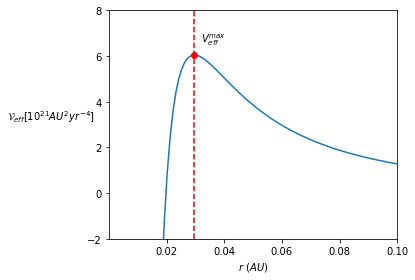

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

rh=0.01976905055545263
rstar=0.02965357583317894
Vmax=6.046895227462673*10**(21)
c=63197.8

r=np.linspace(10**(-10),0.1,10**2)
fig,ax = plt.subplots()
ax.plot(r,10**(-21)*(c**4/(r**2) - (rh*c**4)/(r**3)))
ax.axvline(x=rstar,color='r', linestyle='--')

ax.plot(rstar,Vmax*10**(-21),'ro')
ax.text(0.032,6.6,'$V_{eff}^{max}$')

ax.set_ylim(-2,8)
ax.set_xlim(10**(-10),0.1)
ax.set_ylabel('$\mathcal{V}_{eff} [10^{21} AU^2 yr^{-4}]$',rotation=0)
ax.yaxis.set_label_coords(-0.2,0.5)
ax.set_xlabel('$r\,\,(AU)$')
plt.tight_layout()


#### b) Energy levels $(E=\frac{c^2}{b^{2}})$ in the effective potential

We will obtain the orbit describe for a particle at each energy level.

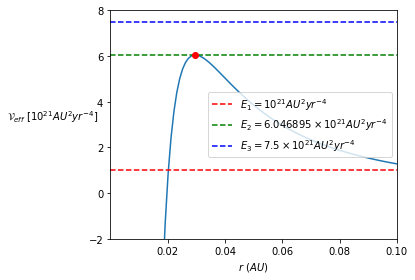

In [ ]:
rh=0.01976905055545263
rstar=0.02965357583317894
Vmax=6.046895227462673*10**(21)
c=63197.8

r=np.linspace(10**(-10),0.1,10**2)
fig,ax = plt.subplots()
ax.plot(r,10**(-21)*(c**4/(r**2) - (rh*c**4)/(r**3)))

ax.axhline(y=1,color='r',linestyle='--',label='$E_1=10^{21} AU^2 yr^{-4}$')
ax.axhline(y=Vmax*10**(-21),color='g',linestyle='--',label='$E_2=6.046895 \\times 10^{21} AU^2 yr^{-4}$')
ax.axhline(y=7.5,color='b',linestyle='--',label='$E_3=7.5 \\times 10^{21} AU^2 yr^{-4}$')

ax.set_ylim(-2,8)
ax.set_xlim(10**(-10),0.1)
ax.set_ylabel('$\mathcal{V}_{eff}\,\,[10^{21} AU^2 yr^{-4}]$',rotation=0)
ax.yaxis.set_label_coords(-0.2,0.5)
ax.set_xlabel('$r\,\,(AU)$')

ax.plot(rstar,Vmax*10**(-21),'ro')

ax.legend(loc="center right", ncol= 1)
plt.tight_layout()


### c) Energy regions in the effective potential

Each type of orbit we will obtain is related to an specific energy region.

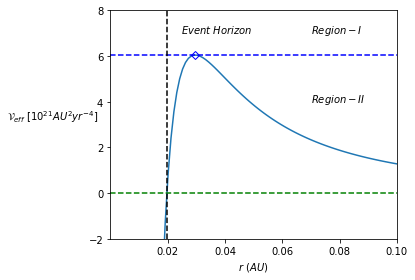

In [ ]:
rh=0.01976905055545263
rstar=0.02965357583317894
Vmax=6.046895227462673*10**(21)
c=63197.8

r=np.linspace(10**(-10),0.1,10**2)
fig,ax = plt.subplots()
ax.plot(r,10**(-21)*(c**4/(r**2) - (rh*c**4)/(r**3)))

ax.axhline(y=Vmax*10**(-21),color='blue',linestyle='--')
ax.axhline(y=0,color='green',linestyle='--')
ax.axvline(x=rh,color='k', linestyle='--')

ax.set_ylim(-2,8)
ax.set_xlim(10**(-10),0.1)
ax.set_ylabel('$\mathcal{V}_{eff}\,\,[10^{21} AU^2 yr^{-4}]$',rotation=0)
ax.yaxis.set_label_coords(-0.2,0.5)
ax.set_xlabel('$r\,\,(AU)$')

ax.plot(rstar,Vmax*10**(-21),'bD',fillstyle='none')
#ax.plot(rminus,Umax,'bD',fillstyle='none')

ax.text(rh+0.005,7,'$Event\,\,Horizon$')
ax.text(.07,7,'$Region-I$')
ax.text(.07,4,'$Region-II$')
plt.tight_layout()


### 2.2 Solution of the orbit equation applying RungeKuta-4

The differential equation of the orbit has the following form:

$$
u''(\varphi)=\frac{3r_h}{2}u^2(\varphi)-u(\varphi)
$$

Where:
$$
u(\varphi)=\frac{1}{r(\varphi)} \quad\quad \& \quad\quad u'(\varphi)=-u^2(\varphi)r'(\varphi)
$$

To obtain the orbit we will apply the 4th order Runge-Kuta method, which is a fairly successful numerical method, for this we will apply the following change of variables:

$$
y_o(\varphi)=u(\varphi)
$$

$$
y_1(\varphi)=u'(\varphi)
$$

In this way, we obtain the following system of two coupled differential equations:

$$
y_1'(\varphi)=\frac{3r_h}{2}y_0^2(\varphi)-y_0(\varphi)
$$

$$
y_0'(\varphi)=y_1(\varphi)
$$

We only require the following initial values to solve this using RK4:

$$
y_0(\varphi_0)=u(\varphi_0)=u_0 \quad\quad,\quad y_1(\varphi_0)=u'(\varphi_0)=u'_0
$$

Let's remember:

$$
u(\varphi_0)=u_0=\frac{1}{r_0} \quad\quad,\quad u'(\varphi_0)=u'_0=-\frac{r'_0}{r^2_0}
$$

Where, from the killing vector $\partial_{\varphi}$ we obtain:

$$
\frac{dr(\varphi)}{d\xi}=r'(\varphi)\frac{d\varphi}{d\xi}=r'(\varphi)\frac{\bar{\mathcal{J}}c^2}{r^2} \rightarrow r'=\frac{dr}{d\xi}\frac{r^2}{\bar{\mathcal{J}}c^2}
$$

Therefore:

$$
u(\varphi_0)=u_0=\frac{1}{r_0} \quad\quad,\quad u'(\varphi_0)=u'_0=-\frac{1}{\bar{\mathcal{J}}c^2}\left(\frac{dr}{d\xi}\right)_0
$$

Next we develop the implementation of the RK4 method:

In [ ]:
rh=0.01976905055545263

def fs(x,yvals):
    y0,y1=yvals
    f0=y1
    f1=(3*rh/2)*y0**2-y0
    return np.array([f0, f1])

def rk4_gen(fs,x0,xf,n,yinits):
    h=(xf-x0)/(n-1)
    xs=x0+np.arange(n)*h
    ys=np.zeros((n, yinits.size))
    yvals=np.copy(yinits)
    for j,x in enumerate(xs):
        ys[j,:]=yvals
        k0=h*fs(x, yvals)
        k1=h*fs(x+h/2, yvals+k0/2)
        k2=h*fs(x+h/2, yvals+k1/2)
        k3=h*fs(x+h, yvals+k2)
        yvals += (k0 + 2*k1 + 2*k2 + k3)/6
    return xs, ys

#### 1.2.1 Plots of the orbits at each energy level.

### a) $E = E_1$

In this case we have $E=E_1=10^{21} AU^2 yr^{-4}$, with which we have the following initial conditions:

$$
r_0\rightarrow \infty \quad \& \quad \left(\frac{dr}{d\xi}\right)_0=\sqrt{E}
$$

In this case we have $E=E_1=10^{21} AU^2 yr^{-4}$, for that value, considering that $r>0$, we will have 2 points of intersection with the effective potential, which are obtained by the equation $\mathcal{V}_{eff}=E_1$:

$$
r_1=0.0202929235574924\,\,AU
$$

$$
r_2=0.1149250369617301\,\,AU
$$

For this case we are going to consider that the particle comes from infinity, $r\rightarrow \infty$,then the effective potential will be:

$$
\lim_{r\rightarrow \infty}\mathcal{V}_{eff}=0
$$

Therefore, we will have that the energy will be completely kinetic:

$$
E=\left(\frac{dr}{d\xi}\right)^{2}+\mathcal{V}_{eff}\approx \left(\frac{dr}{d\xi}\right)^{2}
$$

Then, the initial values are given by:

$$
r_0\rightarrow \infty \quad \& \quad \left(\frac{dr}{d\xi}\right)_0=\sqrt{E}
$$

For numerical purposes we have:

$$
r_0=10^{20}\,\,AU \quad \& \quad \left(\frac{dr}{d\xi}\right)_0=\sqrt{E}
$$

Where:

$$
E=10^{21} AU^2 yr^{-4}
$$

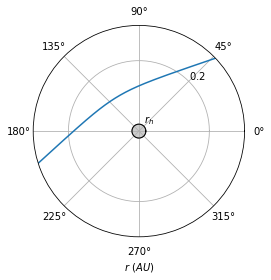

In [ ]:
rh=0.01976905055545263
rstar=0.02965357583317894
Vmax=6.046895227462673*10**(21)
c=63197.8
r0=10**20
r_dot0=np.sqrt(float(10**21))

#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(c**2)
############################################

#### Data obtained from RK4 #####
x0,xf,n=1.1859*np.pi,4*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################
    
########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.3)
ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([rh,0.2])
ax.set_rlabel_position(45)
rtick_labels = ['$r_h$','$0.2$']
ax.set_yticklabels(rtick_labels)
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

### b) $E = E_2$

In this case we have $E=\mathcal{V}_{eff}^{max}=6.046895227462673\times 10^{21}\,\,AU^2 yr^{-4}$, with which we have the following initial conditions:

$$
r_0=r_*=0.02965357583317894\,\,𝐴𝑈 \quad \& \quad \left(\frac{dr}{d\xi}\right)_0=0
$$

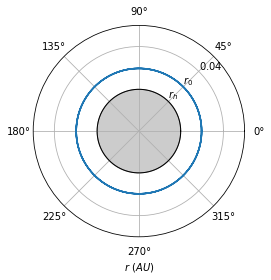

In [ ]:
rh=0.01976905055545263
rstar=0.02965357583317894
Vmax=6.046895227462673*10**(21)
c=63197.8
r0=rstar
r_dot0=0


#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(c**2)
############################################

#### Data obtained from RK4 ####
x0,xf,n=0,6*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################
    
########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_rmax(0.05)
ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([rh,r0,0.04])
ax.set_rlabel_position(45)
rtick_labels = ['$r_h$','$r_0$','$0.04$']
ax.set_yticklabels(rtick_labels)
i=rtick_labels.index('$r_0$') 
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[i].set_linewidth(0)
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

### c) $E = E_3$

In this case we have $E= 7.5 \times 10^{21}\,\,AU^2 yr^{-4}$, for that value, considering that $r>0$, we will not have points of intersection with the effective potential. 

Let us consider that the particle comes from infinity, $r\rightarrow \infty$, then the effective potential will be:

$$
\lim_{r\rightarrow \infty}\mathcal{V}_{eff}=0
$$

Therefore, we will have that the energy will be completely kinetic:

$$
E=\left(\frac{dr}{d\xi}\right)^{2}+\mathcal{V}_{eff}\approx \left(\frac{dr}{d\xi}\right)^{2}
$$

Then, the initial values are given by:

$$
r_0\rightarrow \infty \quad \& \quad \left(\frac{dr}{d\xi}\right)_0=\sqrt{E}
$$

For numerical purposes we have:

$$
r_0=10^{20}\,\,AU \quad \& \quad \left(\frac{dr}{d\xi}\right)_0=\sqrt{E}
$$

Where:

$$
E=7.5 \times 10^{21} AU^2 yr^{-4}
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


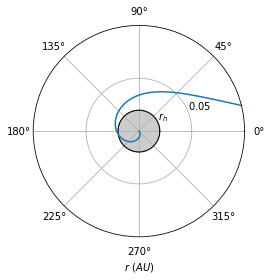

In [ ]:
rh=0.01976905055545263
rstar=0.02965357583317894
Vmax=6.046895227462673*10**(21)
c=63197.8
r0=10**20
r_dot0=np.sqrt(float(7.5*10**21))

#### Initial conditions required for RK4####
u0=1/r0
u_prime0=-r_dot0/(c**2)
############################################

#### Data obtained from RK4 #####
x0,xf,n=3.1*np.pi,6*np.pi,1000
yinits = np.array([u0,u_prime0]) 
xs, ys = rk4_gen(fs,x0,xf,n,yinits)

y_s=np.zeros(n)
for i in range(len(ys[:,0])):
    y_s[i]=1/ys[i,0]
###############################
    
########## Plot ##########
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(xs,y_s)
ax.set_ylim(0,0.1)

ax.set_xlabel('$r\,\,(AU$)')

circle = plt.Circle((0,0), rh, transform=ax.transData._b, fc='gray',ec="k",alpha=0.4)
ax.add_artist(circle)

ax.grid(True)
ax.set_rticks([rh,0.05])
ax.set_rlabel_position(22.5)
rtick_labels = ['$r_h$','$0.05$']
ax.set_yticklabels(rtick_labels)
j=rtick_labels.index('$r_h$') 
rgrid=ax.yaxis.get_gridlines()
rgrid[j].set_linewidth(1)
rgrid[j].set_color('k')
plt.tight_layout()

#########################

## 5. Conclusiones

* El método de Runge-Kuta de orden 4 es bastante poderoso; ya que, nos permite obtener de forma numérica la solución de una ecuación diferencial ordinaria de primer orden con un grado de exactitud bastante favorable para el usuario.

* Tal como vimos durante la sesión, podemos generalizar el método de Rk-4 para un sitema de $n$ EDO acopladas, lo cual nos permitió ir más allá y obtener la solución numérica de una EDO de 2do orden.

* Finalmente, el propósito de esta sesión es mostrar al estudiante que cuando se conoce a fondo el método numérico se puede incursionar en diferentes ámbitos de la física. En particular, obtuvimos las órbitas para un objetivo con, y sin masa, en un espacio-tiempo tipo Schwazrchild.


## 6. Recursos útiles

* Hartle, J. B. (2003). Gravity: an introduction to Einstein’s general relativity.
* Wald, R. M. (2010). General relativity. University of Chicago press.
* Gezerlis, A. (2020). Numerical Methods in Physics with Python. Cambridge University Press.
* Landau, R. H., & Páez, M. J. (2018). Computational Problems for Physics: With Guided Solutions Using Python. CRC Press.


## 7. Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>